In [3]:
import pandas as pd
import numpy as np

&nbsp;  
## 1 Data Preprocessing
#### 1.1 Data Setting

In [4]:
data = pd.read_csv('C:/Users/HOME/Desktop/Run/분석자료(pre4)/전체_계근량(시계열)_v4.csv', encoding='ANSI')
df_sy = pd.DataFrame(data)
df_sy

계량일   하루발생량
0    2019-01-01  109410
1    2019-01-02  174550
2    2019-01-03  190090
3    2019-01-04  150170
4    2019-01-05   19480
..          ...     ...
601  2020-08-27  146990
602  2020-08-28  256640
603  2020-08-29    5110
604  2020-08-30   21640
605  2020-08-31  217890

[606 rows x 2 columns]

### 1.2 Data Split
- 기간1 : 19.01.01 - 19.06.14 &nbsp; / &nbsp; 기간2 : 19.07.15 - 20.08.31

In [5]:
# 2019년 7월 15일 기준 split
df_0715 = df_sy.loc[194:].copy()
df_0715

계량일   하루발생량
194  2019-07-15  329370
195  2019-07-16  252070
196  2019-07-17  352660
197  2019-07-18  268980
198  2019-07-19  289670
..          ...     ...
601  2020-08-27  146990
602  2020-08-28  256640
603  2020-08-29    5110
604  2020-08-30   21640
605  2020-08-31  217890

[412 rows x 2 columns]

In [6]:
# 2019년 6월 14일 기준 split
df_0614 = df_sy.loc[:163].copy()
df_0614

계량일   하루발생량
0    2019-01-01  109410
1    2019-01-02  174550
2    2019-01-03  190090
3    2019-01-04  150170
4    2019-01-05   19480
..          ...     ...
159  2019-06-10  229530
160  2019-06-11  262580
161  2019-06-12  312910
162  2019-06-13  260260
163  2019-06-14  287050

[164 rows x 2 columns]

### 1.3 Data Description
#### 1. Line gragh

In [7]:
# import seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 시각화를 위한 준비
%matplotlib inline 
from matplotlib import font_manager, rc                                                         ## rc == run configure(configuration file)

font_name = font_manager.FontProperties(fname="C:/Users/HOME/AppData/Local/Microsoft/Windows/Fonts/MaruBuri-Regular.ttf").get_name()
rc('font', family=font_name)

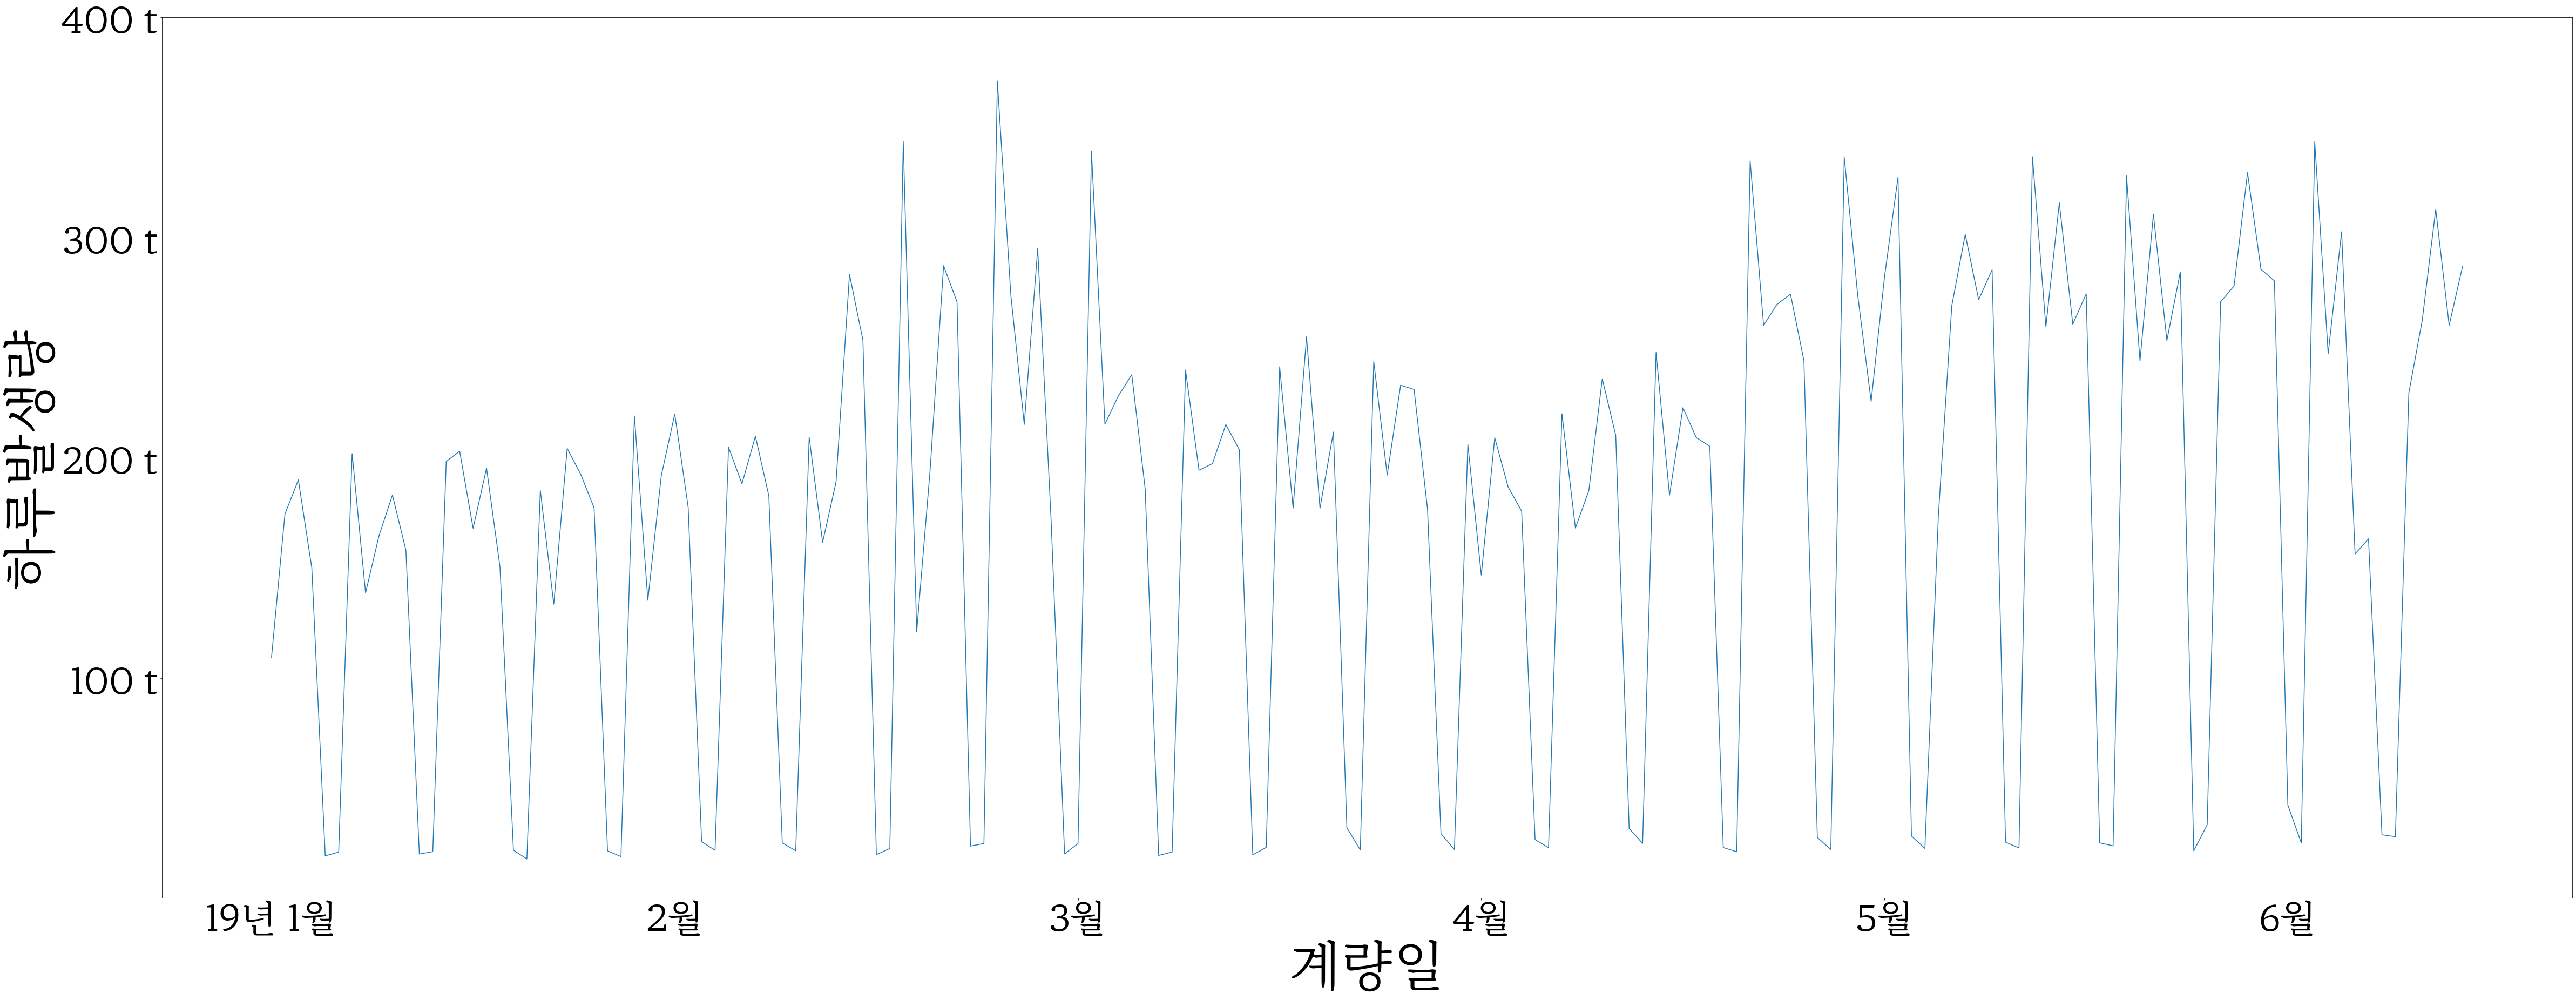

In [8]:
# size
plt.figure(figsize=(80, 30))           ## figure size 변경
plt.rc('font',size=70)                 ## font size 변경

Weight = df_0614['하루발생량']
Date = df_0614['계량일']

plt.plot(Date, Weight)
plt.xlabel('계량일', size = 100)
plt.ylabel('하루발생량', size = 100)

# x 축 설정
x = ["19년 1월"] + ["{}월".format(i + 2) for i in range(5)]
plt.xticks([i for i in range(0,len(Date),30)], x)

y = ['100 t','200 t','300 t','400 t']
plt.yticks([i + 100000 for i in range(0,max(Weight),100000)], y)

plt.show()

In [9]:
# 계량일을 Index로 바꾸고 Column 삭제
df_0614.index = df_0614['계량일']

del df_0614['계량일']

&nbsp;  
#### 2. ACF / PACF

In [10]:
import statsmodels.api as sm
# (diff_ver) from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

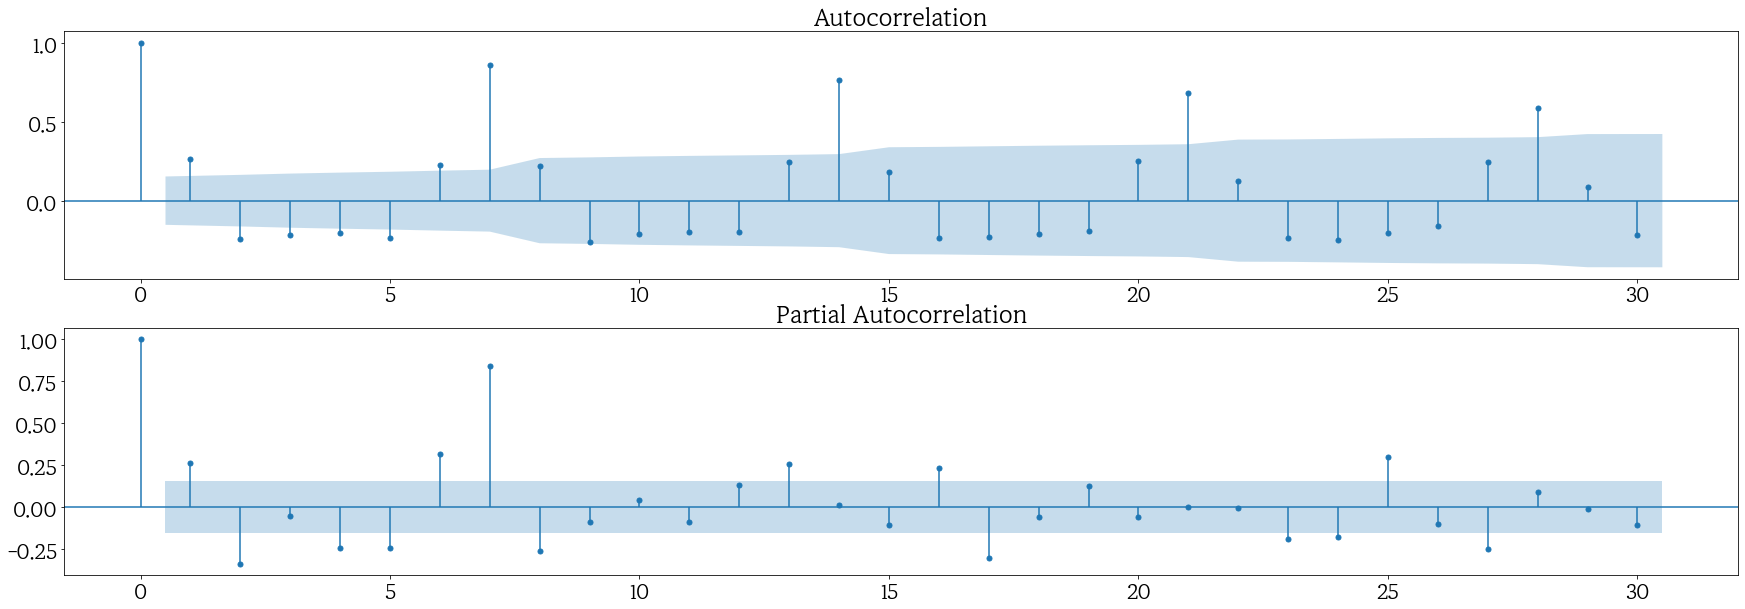

In [11]:
## ACF / PACF 에서 AR 과 MA의 모수를 측정
# size
plt.rc('font',size=20)                 ## font size 변경
fig = plt.figure(figsize=(30,10))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_0614.values.squeeze(), lags=30, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_0614, lags=30, ax=ax2)

## AR(2)를 띈다고 추정. (ACF 완만히 감소, PACF 급격히 감소)

---

&nbsp;  
### 2 Model Fit & Predict

In [12]:
# pip install pmdarima
from pmdarima.arima import auto_arima
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [13]:
# Split (8:2)
train_0614, test_0614 = train_test_split(df_0614, test_size=0.2, shuffle=False)

&nbsp;  
#### 2.1 Model Fit & Predict

In [34]:
# Fit (Auto Arima)
sarima_0614 = auto_arima(train_0614, start_p = 1, start_q = 1, max_p = 4, max_q = 4, m=7, seasonal=True, d=1, D=1,
                             trace=True, error_action='ignore', suppress_warning=True, stepwise=False)

 ARIMA(0,1,0)(0,1,0)[7]             : AIC=3065.456, Time=0.03 sec
 ARIMA(0,1,0)(0,1,1)[7]             : AIC=3067.634, Time=0.06 sec
 ARIMA(0,1,0)(0,1,2)[7]             : AIC=3073.168, Time=0.19 sec
 ARIMA(0,1,0)(1,1,0)[7]             : AIC=3066.811, Time=0.07 sec
 ARIMA(0,1,0)(1,1,1)[7]             : AIC=3064.250, Time=0.50 sec
 ARIMA(0,1,0)(1,1,2)[7]             : AIC=inf, Time=0.81 sec
 ARIMA(0,1,0)(2,1,0)[7]             : AIC=3068.696, Time=0.08 sec
 ARIMA(0,1,0)(2,1,1)[7]             : AIC=3065.787, Time=0.38 sec
 ARIMA(0,1,0)(2,1,2)[7]             : AIC=inf, Time=1.00 sec
 ARIMA(0,1,1)(0,1,0)[7]             : AIC=3011.728, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=3013.024, Time=0.10 sec
 ARIMA(0,1,1)(0,1,2)[7]             : AIC=3012.899, Time=0.21 sec
 ARIMA(0,1,1)(1,1,0)[7]             : AIC=3013.188, Time=0.09 sec
 ARIMA(0,1,1)(1,1,1)[7]             : AIC=3010.486, Time=0.28 sec
 ARIMA(0,1,1)(1,1,2)[7]             : AIC=3012.141, Time=0.41 sec
 ARIMA(0,1,1)(2,1,0)

In [35]:
# Predict
prediction01 = sarima_0614.predict(len(test_0614), return_conf_int=True)
predicted_value01 = prediction01[0]

# Predict Gragh setting
predicted_ub01 = prediction01[1][:,0]
predicted_lb01 = prediction01[1][:,1]
predicted_index = list(test_0614.index)

# r2 score
r2_01 = r2_score(test_0614, predicted_value01)
r2_01

# ARIMA(0,0,0)(0,1,0)[7] r2 == 0.70
# ARIMA(2,1,1)(1,1,1)[7] r2 == 0.75
# ARIMA(0,2,3)(0,1,0)[7] r2 == 0.60
# ARIMA(1,0,2)(1,1,1)[14] r2 == 0.71
# ARIMA(2,1,1)(1,1,1)[14] r2 == 0.76
# ARIMA(3,2,2)(0,1,0)[14] r2 == 0.68
# ARIMA(2,0,2)(0,1,1)[28] r2 == 0.73
# ARIMA(2,1,3)(0,1,0)[28] r2 == 0.68
# ARIMA(2,2,2)(0,1,1)[28] r2 == 0.70

0.7598568543055902

&nbsp;  
#### 2.2 Adjust

In [14]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
# ARIMA(0,0,0)(0,1,0)[7] r2 == 0.70
# ARIMA(2,1,1)(1,1,1)[7] r2 == 0.75
# ARIMA(0,2,3)(0,1,0)[7] r2 == 0.60
# ARIMA(1,0,2)(1,1,1)[14] r2 == 0.71
# ARIMA(2,1,1)(1,1,1)[14] r2 == 0.76
# ARIMA(3,2,2)(0,1,0)[14] r2 == 0.68
# ARIMA(2,0,2)(0,1,1)[28] r2 == 0.73
# ARIMA(2,1,3)(0,1,0)[28] r2 == 0.68
# ARIMA(2,2,2)(0,1,1)[28] r2 == 0.70

In [56]:
# 만든 모델로 전체 학습 후, 해당기간 추측
df_aj01 = df_0614.copy()

model_aj01 = SARIMAX(df_aj01.values, order=(2,1,1), seasonal_order = (1,1,1,14))
model_aj01_ft = model_aj01.fit()
model_aj01_ft.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  164
Model:             SARIMAX(2, 1, 1)x(1, 1, 1, 14)   Log Likelihood               -1846.214
Date:                            Fri, 15 Jan 2021   AIC                           3704.427
Time:                                    02:25:21   BIC                           3722.451
Sample:                                         0   HQIC                          3711.750
                                            - 164                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0208      0.097     -0.214      0.830      -0.211       0.170
ar.L2         -0.2957      0.083     -3.570      0.000      -0.458      -0.133
ma.L1         -0.7426      0.105     -7.048      0.000      -0.949      -0.536
ar.S.L14       0.3287      0.279      1.178      0.239      -0.218       0.876
ma.S.L14      -0.6346      0.269     -2.358      0.018      -1.162      -0.107
sigma2      3.962e+09    1.5e-10   2.64e+19      0.000    3.96e+09    3.96e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                81.38
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               0.41   Skew:                             0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.08e+34. Standard errors may be unstable.
"""

In [16]:
# predict (interval)
predict_aj_int = model_aj01_ft.get_forecast(30)
aj01_value = predict_aj_int.predicted_mean

aj01_value

# .get_forecast vs .forecast  : get_forecast == interval, .forecast == value 

array([ 31212.11659364,  10170.85801518, 311950.06757907, 238474.22484266,
       285954.57178146, 178464.95370078, 184171.0934947 ,  21205.60766436,
        20187.17344109, 238822.63714536, 249844.41536736, 295710.61514072,
       251954.99191368, 272519.38553187,  24331.05664064,   6706.01501468,
       298975.64746401, 231672.57167194, 277810.6706153 , 183401.32534126,
       188353.87206145,  15869.04913559,  14914.55045382, 239257.8084958 ,
       243005.7025986 , 287397.63062488, 246575.4835746 , 265095.61541447,
        19418.41551338,   2915.68014101])

In [18]:
# predict (value)
predict_aj01 = model_aj01_ft.forecast(30)  
print(predict_aj01)

## sample 추출 -> 이 뒤로는 .predicted_mean으로 채울 것

[ 31212.11659364  10170.85801518 311950.06757907 238474.22484266
 285954.57178146 178464.95370078 184171.0934947   21205.60766436
  20187.17344109 238822.63714536 249844.41536736 295710.61514072
 251954.99191368 272519.38553187  24331.05664064   6706.01501468
 298975.64746401 231672.57167194 277810.6706153  183401.32534126
 188353.87206145  15869.04913559  14914.55045382 239257.8084958
 243005.7025986  287397.63062488 246575.4835746  265095.61541447
  19418.41551338   2915.68014101]


In [19]:
# Adjusted Data Set
## 대상 : df_sd_r.loc[164:193]
df_aj01 = df_sy.loc[164:193].copy()

df_aj01.loc[164:193,'하루발생량'] = predict_aj01
df_aj01

계량일          하루발생량
164  2019-06-15   31212.116594
165  2019-06-16   10170.858015
166  2019-06-17  311950.067579
167  2019-06-18  238474.224843
168  2019-06-19  285954.571781
169  2019-06-20  178464.953701
170  2019-06-21  184171.093495
171  2019-06-22   21205.607664
172  2019-06-23   20187.173441
173  2019-06-24  238822.637145
174  2019-06-25  249844.415367
175  2019-06-26  295710.615141
176  2019-06-27  251954.991914
177  2019-06-28  272519.385532
178  2019-06-29   24331.056641
179  2019-06-30    6706.015015
180  2019-07-01  298975.647464
181  2019-07-02  231672.571672
182  2019-07-03  277810.670615
183  2019-07-04  183401.325341
184  2019-07-05  188353.872061
185  2019-07-06   15869.049136
186  2019-07-07   14914.550454
187  2019-07-08  239257.808496
188  2019-07-09  243005.702599
189  2019-07-10  287397.630625
190  2019-07-11  246575.483575
191  2019-07-12  265095.615414
192  2019-07-13   19418.415513
193  2019-07-14    2915.680141

In [35]:
# csv save
df_aj01.to_csv('C:/Users/HOME/Desktop/Run/분석자료(pre4)/arima_1.csv', encoding='ANSI', index=False)

&nbsp;  
#### 2.3 Gragh Difference

In [20]:
# data setting(Raw)
df_raw01 = df_sy.loc[:193].copy()

df_raw01.index = df_raw01['계량일']

del df_raw01['계량일']

df_raw01

하루발생량
계량일               
2019-01-01  109410
2019-01-02  174550
2019-01-03  190090
2019-01-04  150170
2019-01-05   19480
...            ...
2019-07-10   98050
2019-07-11   83740
2019-07-12   80570
2019-07-13    6630
2019-07-14   14810

[194 rows x 1 columns]

In [21]:
# data setting (Predict_v1)
df_aj01.index=df_aj01['계량일']

del df_aj01['계량일']

df_0714 = pd.concat([df_0614,df_aj01])
df_0714

하루발생량
계량일                      
2019-01-01  109410.000000
2019-01-02  174550.000000
2019-01-03  190090.000000
2019-01-04  150170.000000
2019-01-05   19480.000000
...                   ...
2019-07-10  287397.630625
2019-07-11  246575.483575
2019-07-12  265095.615414
2019-07-13   19418.415513
2019-07-14    2915.680141

[194 rows x 1 columns]

In [22]:
# data setting (Predict_v2)
aj01_index = list(range(164,194))

df_aj01['하루발생량'].values

array([ 31212.11659364,  10170.85801518, 311950.06757907, 238474.22484266,
       285954.57178146, 178464.95370078, 184171.0934947 ,  21205.60766436,
        20187.17344109, 238822.63714536, 249844.41536736, 295710.61514072,
       251954.99191368, 272519.38553187,  24331.05664064,   6706.01501468,
       298975.64746401, 231672.57167194, 277810.6706153 , 183401.32534126,
       188353.87206145,  15869.04913559,  14914.55045382, 239257.8084958 ,
       243005.7025986 , 287397.63062488, 246575.4835746 , 265095.61541447,
        19418.41551338,   2915.68014101])

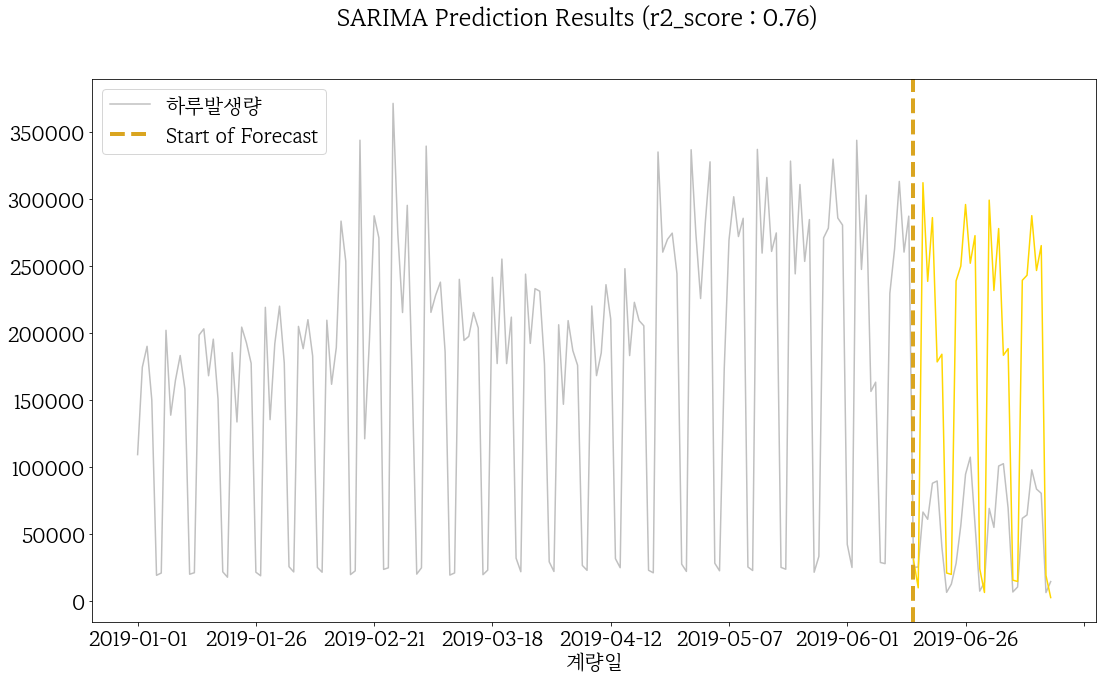

In [23]:
fig, ax = plt.subplots(figsize=(18,10))
plt.rc('font',size=20)

df_raw01.plot(ax=ax, color='silver')
plt.plot(aj01_index, df_aj01['하루발생량'].values, color='gold')
plt.axvline(x=164, color='goldenrod', linestyle='--', linewidth=4, label='Start of Forecast')

ax.legend(loc='upper left')
plt.suptitle(f'SARIMA Prediction Results (r2_score : 0.76)')
plt.show()

---

&nbsp;  
### 3 2021 Predict
#### 3.1 Data Setting

In [24]:
# df_0714 + df_0715

df_0715.index = df_0715['계량일']

del df_0715['계량일']

df_pr1 = pd.concat([df_0714,df_0715])
df_pr1

## len(df_pr1) == 606

하루발생량
계량일                 
2019-01-01  109410.0
2019-01-02  174550.0
2019-01-03  190090.0
2019-01-04  150170.0
2019-01-05   19480.0
...              ...
2020-08-27  146990.0
2020-08-28  256640.0
2020-08-29    5110.0
2020-08-30   21640.0
2020-08-31  217890.0

[606 rows x 1 columns]

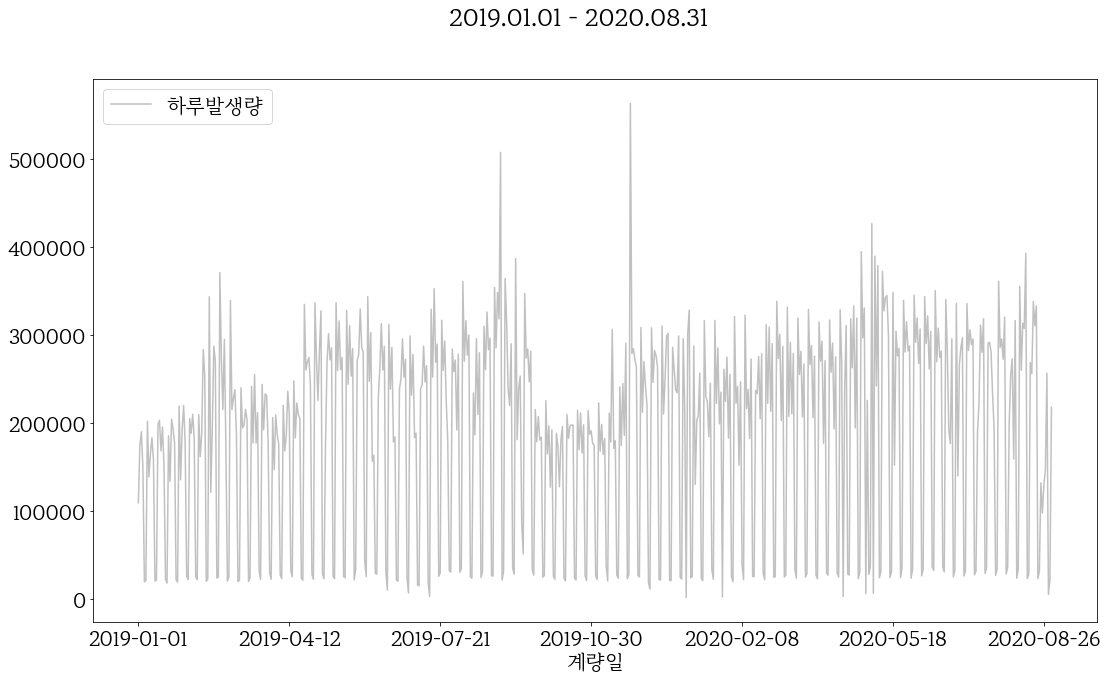

In [50]:
# 전체 그래프
fig, ax = plt.subplots(figsize=(18,10))
plt.rc('font',size=20)

df_pr1.plot(ax=ax, color='silver')

ax.legend(loc='upper left')
plt.suptitle(f'2019.01.01 - 2020.08.31')
plt.show()

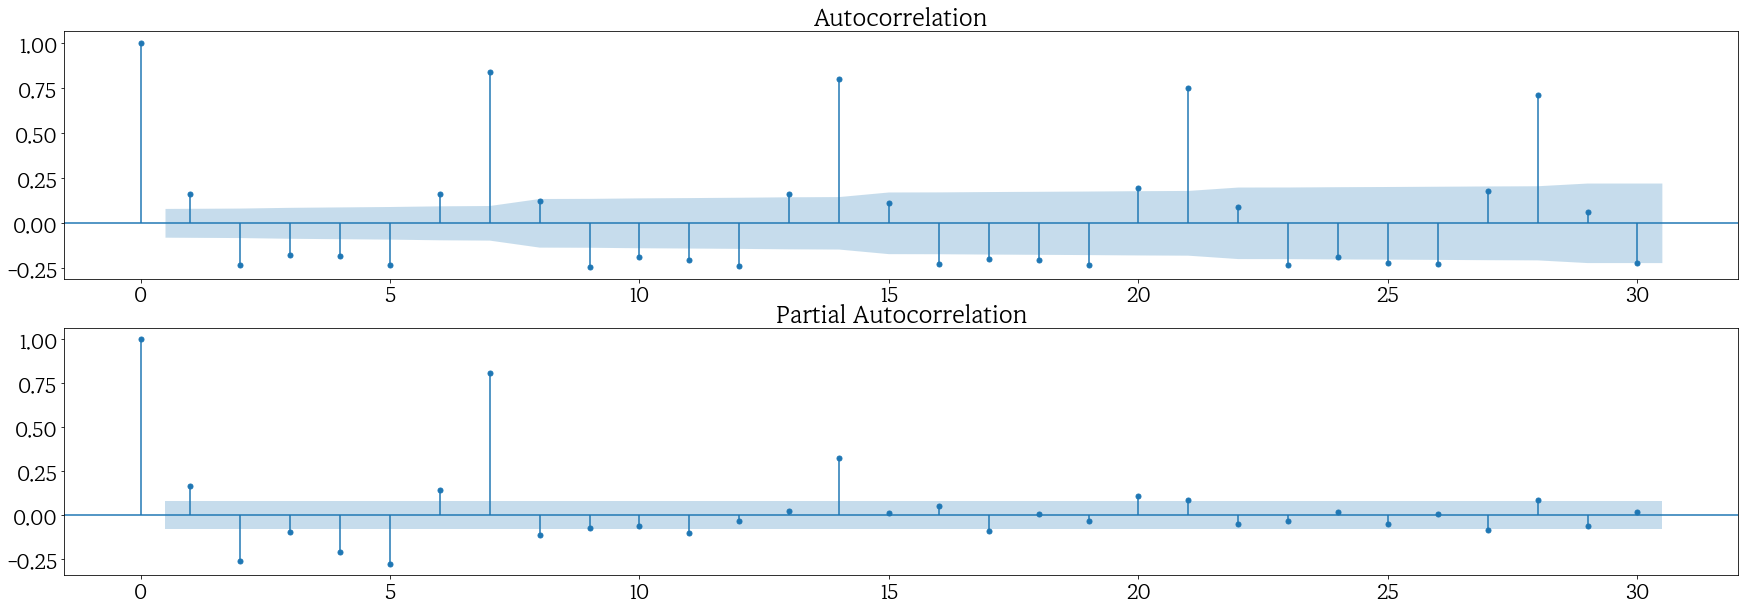

In [36]:
## ACF / PACF 에서 AR 과 MA의 모수를 측정
# size
plt.rc('font',size=20)                 ## font size 변경
fig = plt.figure(figsize=(30,10))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_pr1.values.squeeze(), lags=30, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_pr1, lags=30, ax=ax2)

# m=7, D=1로 추정

&nbsp;  
#### 3.2 Model Fit & Predict

In [25]:
# Split (8:2)
train_pr1, test_pr1 = train_test_split(df_pr1, test_size=0.2, shuffle=False)

In [51]:
# Model Test(Auto Arima)
try :
    sarima_pr1 = auto_arima(train_pr1, start_p = 1, start_q = 1, max_p = 5, max_q = 5, m=14, seasonal=True, d=1, D=1,
                            trace=True, error_action='ignore', suppress_warning=True, stepwise=False)
except :
    pass

 ARIMA(0,1,0)(0,1,0)[14]             : AIC=12117.214, Time=0.08 sec
 ARIMA(0,1,0)(0,1,1)[14]             : AIC=12066.633, Time=0.58 sec
 ARIMA(0,1,0)(0,1,2)[14]             : AIC=12070.037, Time=0.87 sec
 ARIMA(0,1,0)(1,1,0)[14]             : AIC=12073.939, Time=0.31 sec
 ARIMA(0,1,0)(1,1,1)[14]             : AIC=12068.877, Time=0.67 sec
 ARIMA(0,1,0)(1,1,2)[14]             : AIC=12070.197, Time=3.71 sec
 ARIMA(0,1,0)(2,1,0)[14]             : AIC=12071.705, Time=0.84 sec
 ARIMA(0,1,0)(2,1,1)[14]             : AIC=12070.728, Time=2.20 sec
 ARIMA(0,1,0)(2,1,2)[14]             : AIC=12070.152, Time=4.33 sec
 ARIMA(0,1,1)(0,1,0)[14]             : AIC=11835.407, Time=0.13 sec
 ARIMA(0,1,1)(0,1,1)[14]             : AIC=11792.657, Time=0.69 sec
 ARIMA(0,1,1)(0,1,2)[14]             : AIC=11793.996, Time=1.69 sec
 ARIMA(0,1,1)(1,1,0)[14]             : AIC=11800.375, Time=0.57 sec
 ARIMA(0,1,1)(1,1,1)[14]             : AIC=11793.901, Time=0.94 sec
 ARIMA(0,1,1)(1,1,2)[14]             : AIC=11795

In [47]:
# Predict
prediction02 = sarima_pr1.predict(len(test_pr1), return_conf_int=True)
predicted_value02 = prediction02[0]

# r2 score
r2_02 = r2_score(test_pr1, predicted_value02)
r2_02

# ARIMA(3,1,1)(0,1,1)[7] r2 == 0.49
# ARIMA(4,0,0)(0,1,1)[7] r2 == 0.51
# ARIMA(2,1,2)(0,1,1)[14] r2 == 0.65


0.23976870757402713

In [27]:
# 만든 모델로 전체 학습 후, 해당기간 추측
df_aj02 = df_pr1.copy()

model_aj02 = SARIMAX(df_aj02.values, order=(2,1,2), seasonal_order = (0,1,1,14))
model_aj02_ft = model_aj01.fit()
model_aj02_ft.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  164
Model:             SARIMAX(2, 1, 1)x(1, 1, 1, 14)   Log Likelihood               -1846.214
Date:                            Thu, 14 Jan 2021   AIC                           3704.427
Time:                                    02:10:23   BIC                           3722.451
Sample:                                         0   HQIC                          3711.750
                                            - 164                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0208      0.097     -0.214      0.830      -0.211       0.170
ar.L2         -0.2957      0.083     -3.570      0.000      -0.458      -0.133
ma.L1         -0.7426      0.105     -7.048      0.000      -0.949      -0.536
ar.S.L14       0.3287      0.279      1.178      0.239      -0.218       0.876
ma.S.L14      -0.6346      0.269     -2.358      0.018      -1.162      -0.107
sigma2      3.962e+09    1.5e-10   2.64e+19      0.000    3.96e+09    3.96e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                81.38
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               0.41   Skew:                             0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.08e+34. Standard errors may be unstable.
"""

In [28]:
# predict (interval)
predict_aj02 = model_aj02_ft.forecast(212)
predict_aj02_int = model_aj02_ft.get_forecast(212)
aj02_value = predict_aj02_int.predicted_mean
aj02_value

array([ 31212.11659364,  10170.85801518, 311950.06757907, 238474.22484266,
       285954.57178146, 178464.95370078, 184171.0934947 ,  21205.60766436,
        20187.17344109, 238822.63714536, 249844.41536736, 295710.61514072,
       251954.99191368, 272519.38553187,  24331.05664064,   6706.01501468,
       298975.64746401, 231672.57167194, 277810.6706153 , 183401.32534126,
       188353.87206145,  15869.04913559,  14914.55045382, 239257.8084958 ,
       243005.7025986 , 287397.63062488, 246575.4835746 , 265095.61541447,
        19418.41551338,   2915.68014101, 292060.7163724 , 226786.56905774,
       272483.24014546, 182372.94799141, 187077.89281701,  11464.36288479,
        10530.85371773, 236750.08732325, 238107.28540106, 282014.66579491,
       242156.66049868, 260004.90595438,  15153.03796792,   -980.82966226,
       287137.24718718, 222529.94659943, 268081.53390952, 179384.20900597,
       184007.7746467 ,   7365.93442974,   6439.3238789 , 233275.13326555,
       233846.58269015, 2

In [30]:
aj02_index = list(range(606,818))

&nbsp;  
#### 3.3 Gragh

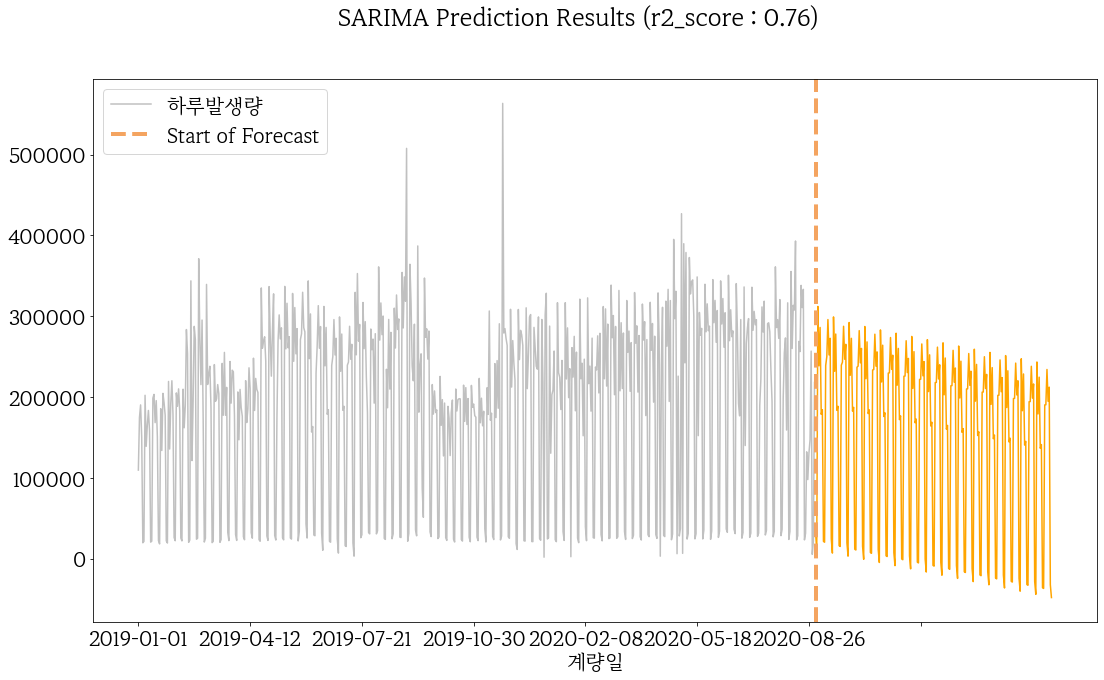

In [31]:
fig, ax = plt.subplots(figsize=(18,10))
plt.rc('font',size=20)

df_pr1.plot(ax=ax, color='silver')
plt.plot(aj02_index, aj02_value , color='orange')
plt.axvline(x=606, color='sandybrown', linestyle='--', linewidth=4, label='Start of Forecast')

ax.legend(loc='upper left')
plt.suptitle(f'SARIMA Prediction Results (r2_score : 0.76)')
plt.show()

In [168]:
# csv save
aj02 = pd.DataFrame(aj02_value)

df_pr1.to_csv('C:/Users/HOME/Desktop/Run/분석자료(pre4)/arima_2.csv', encoding='ANSI')
aj02.to_csv('C:/Users/HOME/Desktop/Run/분석자료(pre4)/arima_3.csv', encoding='ANSI', index=False)

---